## Time Series Prediction (Rolling Window Approach)
---

#### Import some python libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("poster")

#### helper functions 

In [2]:
def rolling_univariate_window(time_series, window_size):    
    shape = (time_series.shape[0] - window_size + 1, window_size)  
    strides = time_series.strides + (time_series.strides[-1],)
    return np.lib.stride_tricks.as_strided(time_series, shape=shape, strides=strides)


def rolling_multivariate_window(time_series, window_size): 
    # converting strides from FT to C  
    # https://stackoverflow.com/questions/29673396/unlike-numpy-pandas-doesnt-seem-to-like-memory-strides
    time_series = time_series.copy('C') 
    shape = (time_series.shape[0] - window_size + 1, window_size, 2)  # 2 is num of features
    strides = (16, 16, 8)
    out = np.lib.stride_tricks.as_strided(time_series, shape=shape, strides=strides)
    return out.reshape(out.shape[0], out.shape[1]*out.shape[2])

def build_rolling_window_dataset(time_series, window_size, univariate=True):
    time_series = time_series[:-1]
    if univariate:
        last_element = time_series[-1]
        X_train = rolling_univariate_window(time_series, window_size)
        y_train = np.array([X_train[i, window_size-1] for i in range(1, X_train.shape[0])])
    else:
        last_element = time_series[-1][-1]
        X_train = rolling_multivariate_window(time_series, window_size)
        y_train = np.array([X_train[i, window_size*2-1] for i in range(1, X_train.shape[0])]) # 2 is num of features        
    
    return X_train, np.hstack((y_train, last_element))

def train_test_split(no_of_training_instances, X_all, y_all):
    X_train = X_all[0:no_of_training_instances, :]
    X_test = X_all[no_of_training_instances:, :]
    y_train = y_all[0:no_of_training_instances]
    y_test = y_all[no_of_training_instances:]
    
    return X_train, X_test, y_train, y_test

def print_graph(X_all, X_test, y_all, y_test, y_pred):
    training_size = X_all.shape[0] - X_test.shape[0]
    x_full_limit = np.linspace(1, X_all.shape[0], X_all.shape[0])
    y_pred_limit = np.linspace(training_size+1, training_size + 1 + X_test.shape[0], X_test.shape[0])
    plt.plot(x_full_limit, y_all, label='actual', color='b', linewidth=1)
    plt.plot(y_pred_limit, y_pred, '--', color='r', linewidth=2, label='prediction')
    plt.legend(loc=0)
    plt.show()

#### Loading some time series datasets

In [3]:
# http://robjhyndman.com/tsdldata/data/nybirths.dat
nybirths = pd.read_csv('./data/nybirths.csv')
nybirths = nybirths.values.flatten()

# http://robjhyndman.com/tsdldata/data/fancy.dat
souvenirtimeseries = pd.read_csv('./data/fancy.csv')
souvenirtimeseries = souvenirtimeseries.values.flatten()

# https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line
milk_production_data = pd.read_csv('./data/milk_production.csv')
milk_production = milk_production_data['Production'].values.flatten()

sim = pd.read_csv('./data/simulation.csv', names=['time', 'temparature'])['temparature']
sim = sim.values.flatten()

#### Milk production dataset
---

mean_absolute_error: 7.247295


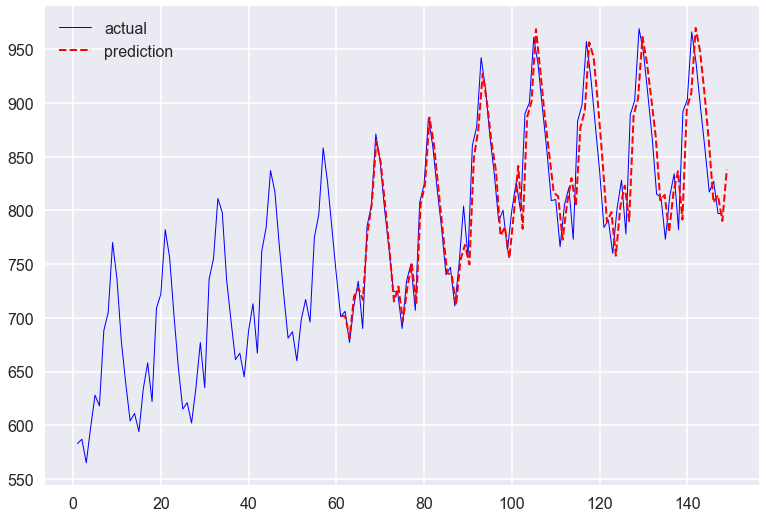

In [4]:
window_size = 20
training_set_size = 60

X_all, y_all = build_rolling_window_dataset(milk_production, window_size)
X_train, X_test, y_train, y_test = train_test_split(training_set_size, X_all, y_all)

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)  
print("mean_absolute_error: %f" %(mean_absolute_error(y_test, y_pred)))
print_graph(X_all, X_test, y_all, y_test, y_pred)

mean_absolute_error: 0.476471


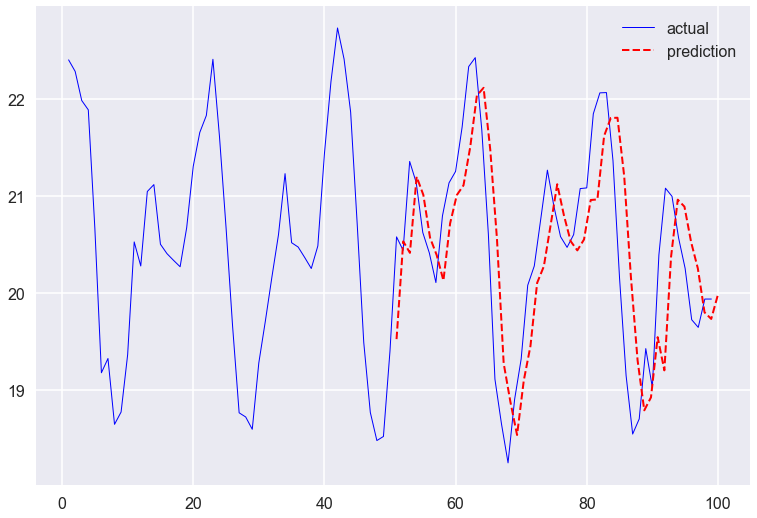

In [5]:
window_size = 1
training_set_size = 50

X_all, y_all = build_rolling_window_dataset(sim, window_size)
#print X_all
X_train, X_test, y_train, y_test = train_test_split(training_set_size, X_all, y_all)

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)  
print("mean_absolute_error: %f" %(mean_absolute_error(y_test, y_pred)))
print_graph(X_all, X_test, y_all, y_test, y_pred)

#### births dataset
----

mean_absolute_error: 0.664105


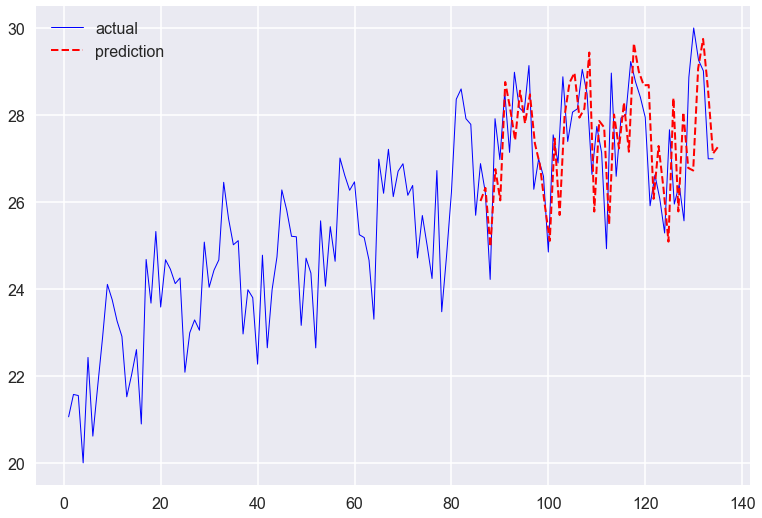

In [6]:
window_size = 33
training_set_size = 85

X_all, y_all = build_rolling_window_dataset(nybirths, window_size)
X_train, X_test, y_train, y_test = train_test_split(training_set_size, X_all, y_all)

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)    
print("mean_absolute_error: %f" %(mean_absolute_error(y_test, y_pred)))
print_graph(X_all, X_test, y_all, y_test, y_pred)

#### souvenir dataset
----

mean_absolute_error: 8342.483597


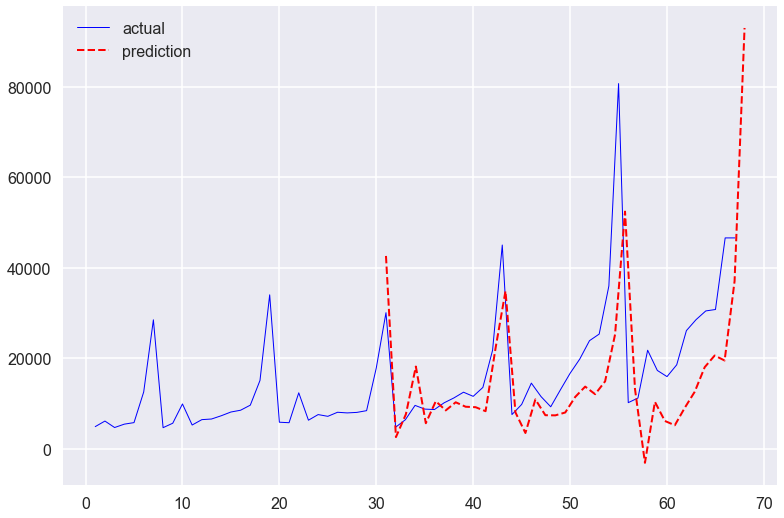

In [7]:
window_size = 16
training_set_size = 30

X_all, y_all = build_rolling_window_dataset(souvenirtimeseries, window_size)
X_train, X_test, y_train, y_test = train_test_split(training_set_size, X_all, y_all)

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)    
print("mean_absolute_error: %f" %(mean_absolute_error(y_test, y_pred)))
print_graph(X_all, X_test, y_all, y_test, y_pred)

In [8]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
X_all, y_all = build_rolling_window_dataset(x, 5)

In [9]:
X_all

array([[1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8],
       [5, 6, 7, 8, 9]])

In [10]:
y_all

array([6, 7, 8, 9, 9])

In [11]:
utt_revenue = pd.read_csv('./utt_revenue.csv')
utt_revenue['date_time'] = pd.to_datetime(utt_revenue['time_year'].astype(str) + '-' + utt_revenue['time_month'].astype(str))
utt_revenue = utt_revenue.sort_values(by='date_time')

In [12]:
utt_revenue

,time_key,time_year,time_month,time_amount,date_time
0,126196,2014,1,2618932.42,2014-01-01
20,126196,2014,2,1823439.47,2014-02-01
30,126196,2014,3,2148374.68,2014-03-01
1,126196,2014,4,2770325.86,2014-04-01
21,126196,2014,5,3489052.05,2014-05-01
31,126196,2014,6,4777329.45,2014-06-01
10,126196,2014,7,7159640.02,2014-07-01
22,126196,2014,8,7249467.09,2014-08-01
32,126196,2014,9,10896274.10,2014-09-01
11,126196,2014,10,13492550.69,2014-10-01


In [13]:
utt_revenue = utt_revenue['time_amount'].values
print(utt_revenue)

[  2618932.42   1823439.47   2148374.68   2770325.86   3489052.05
   4777329.45   7159640.02   7249467.09  10896274.1   13492550.69
   9756691.06  10112958.52  10512039.4   10529935.23  11727656.93
  14077354.12  12195682.51  14758722.98   9572212.69  20376603.43
  20902231.53  20116672.71  36051346.57  25783444.68  26383762.91
  30483797.08  57942591.69  41152144.36  51516619.66  35880328.11
  23689137.81  25801413.93  26024814.3   28510874.2   29065866.07
  37479864.1   44333221.59  33284483.6   27444611.45  22789895.97
  22480384.27  10264643.52  10950179.3   17701196.88]


mean_absolute_error: 9593358.520965


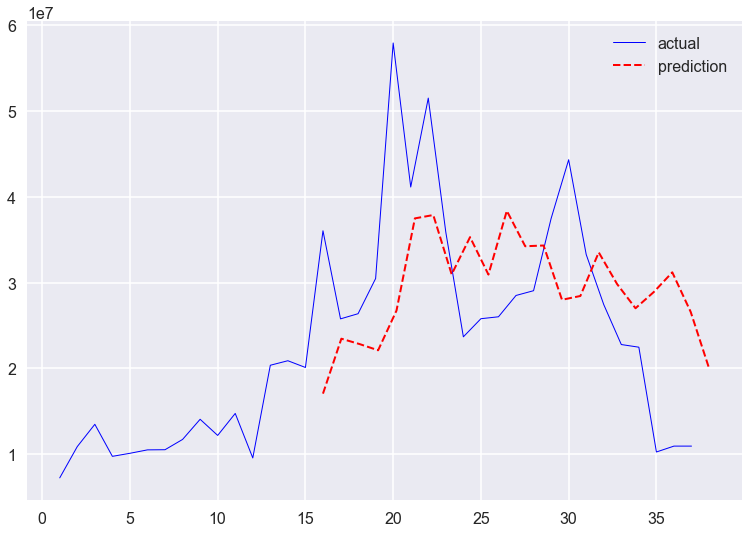

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

training_set_size = 15
window_size = 7
X_all, y_all = build_rolling_window_dataset(utt_revenue, window_size)
X_train, X_test, y_train, y_test = train_test_split(training_set_size, X_all, y_all)

lr = LinearRegression(normalize=False)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)    
print("mean_absolute_error: %f" %(mean_absolute_error(y_test, y_pred)))
print_graph(X_all, X_test, y_all, y_test, y_pred)

In [15]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

y_mov = y_all[:-1]
moving_avg = moving_average(y_mov, n=window_size)[training_set_size - window_size:]

assert len(moving_avg) == len(y_test)

ml_better = 0
mv_better = 0
print('{0:>10s}   {1:>23s}, {2:>27s}'.format('Actual', 'Predicted', 'Moving Avg:'))
print('=====================================================================')
for p, a, m in zip(y_pred, y_test, moving_avg):
    print('{0:>15,.3f}    {1:>20,.3f}   {2:>25,.3f}'.format(a, p, m))
    ac_ml_diff = np.abs(a - p)
    ac_mv_diff = np.abs(a - m)
    if ac_ml_diff < ac_mv_diff:
        ml_better += 1
    else:
        mv_better += 1
print('')
print('Machine learning does better than moving average: {}'.format(ml_better))
print('Moveing average does better than machine learning: {}'.format(mv_better))
print('Total number of months in testing set: {}'.format(ml_better + mv_better))

    Actual                 Predicted,                 Moving Avg:
 36,051,346.570          17,066,600.495              15,999,925.710
 25,783,444.680          23,470,796.216              19,139,067.489
 26,383,762.910          22,838,225.991              21,080,176.370
 30,483,797.080          22,120,261.023              22,740,896.360
 57,942,591.690          26,755,019.755              25,728,265.559
 41,152,144.360          37,496,393.629              31,094,835.310
 51,516,619.660          37,885,910.446              33,987,680.000
 35,880,328.110          30,971,570.013              38,473,386.707
 23,689,137.810          35,309,922.644              38,448,955.499
 25,801,413.930          30,945,154.776              38,149,768.803
 26,024,814.300          38,377,219.866              38,066,576.091
 28,510,874.200          34,248,723.879              37,429,578.551
 29,065,866.070          34,333,598.296              33,225,047.481
 37,479,864.100          28,006,968.519           

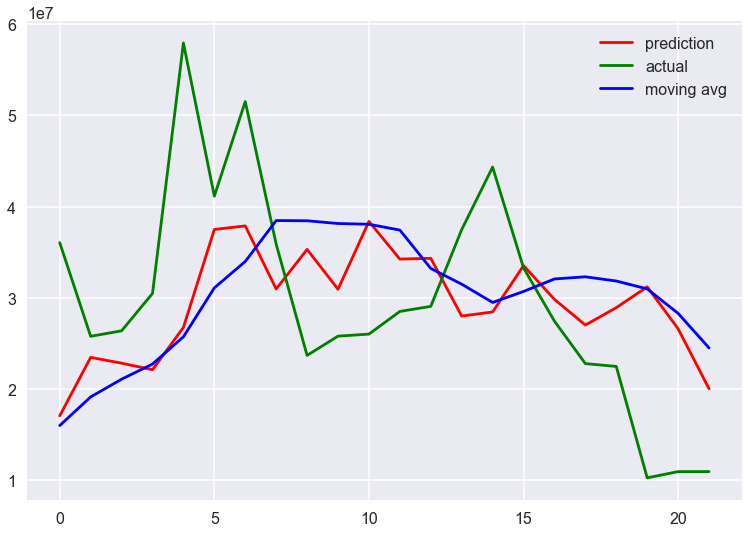

In [16]:
plt.plot(y_pred, color='r', label='prediction')
plt.plot(y_test, color='g', label='actual')
plt.plot(moving_avg, color='b', label='moving avg')
plt.legend()

In [17]:
utt_multi_revenue = pd.read_csv('./utt_revenue_with_revenue_and_num_visits.csv')
utt_multi_revenue['date_time'] = pd.to_datetime(utt_multi_revenue['time_year'].astype(str) + 
                                                '-' + utt_multi_revenue['time_month'].astype(str))
utt_multi_revenue = utt_multi_revenue.sort_values(by='date_time')

In [18]:
utt_multi_revenue

,time_key,time_year,time_month,time_visits,time_amount,date_time
0,126196,2013,12,885,1971644.50,2013-12-01
1,126196,2014,1,1058,2247394.84,2014-01-01
2,126196,2014,2,816,1707854.87,2014-02-01
3,126196,2014,3,1010,2152576.41,2014-03-01
4,126196,2014,4,1309,2824699.80,2014-04-01
5,126196,2014,5,2134,3976545.26,2014-05-01
6,126196,2014,6,2397,6020282.37,2014-06-01
7,126196,2014,7,3000,7372607.26,2014-07-01
8,126196,2014,8,6057,17635066.29,2014-08-01
9,126196,2014,9,7104,19688738.35,2014-09-01


mean_absolute_error: 7358510.436848


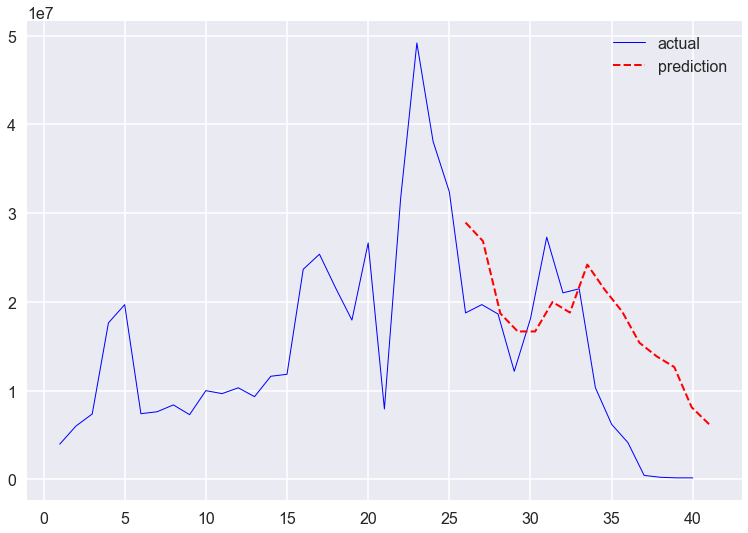

    Actual                 Predicted,                 Moving Avg:
 18,759,313.330          28,937,449.309              31,841,039.292
 19,695,985.840          26,845,985.226              34,005,170.344
 18,637,705.120          18,696,867.199              31,618,584.672
 12,182,479.770          16,672,254.261              25,513,377.332
 18,117,363.970          16,669,512.652              20,335,416.688
 27,290,856.020          19,988,051.170              17,478,569.606
 21,021,327.200          18,800,715.346              19,184,878.144
 21,472,526.380          24,201,068.770              19,449,946.416
 10,327,678.720          21,381,059.414              20,016,910.668
  6,208,546.790          18,915,875.834              19,645,950.458
  4,154,724.150          15,392,596.403              17,264,187.022
    459,126.730          13,851,827.734              12,636,960.648
    245,334.430          12,661,439.593               8,524,520.554
    181,083.440           8,130,467.154           

In [19]:
training_set_size = 25
window_size = 5
X_all, y_all = build_rolling_window_dataset(utt_multi_revenue[['time_visits', 'time_amount']].values, 
                                            window_size, univariate=False)
X_train, X_test, y_train, y_test = train_test_split(training_set_size, X_all, y_all)

#lr = Lasso(normalize=False, max_iter=5000, alpha=0.01)
lr = RandomForestRegressor(n_estimators=1000)
#lr = GradientBoostingRegressor(max_depth=5, n_estimators=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)    
print("mean_absolute_error: %f" %(mean_absolute_error(y_test, y_pred)))
print_graph(X_all, X_test, y_all, y_test, y_pred)

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

y_mov = y_all[:-1]
moving_avg = moving_average(y_mov, n=window_size)[training_set_size - window_size:]

assert len(moving_avg) == len(y_test)

ml_better = 0
mv_better = 0
print('{0:>10s}   {1:>23s}, {2:>27s}'.format('Actual', 'Predicted', 'Moving Avg:'))
print('=====================================================================')
for p, a, m in zip(y_pred, y_test, moving_avg):
    print('{0:>15,.3f}    {1:>20,.3f}   {2:>25,.3f}'.format(a, p, m))
    ac_ml_diff = np.abs(a - p)
    ac_mv_diff = np.abs(a - m)
    if ac_ml_diff < ac_mv_diff:
        ml_better += 1
    else:
        mv_better += 1
print('')
print('Machine learning does better than moving average: {}'.format(ml_better))
print('Moveing average does better than machine learning: {}'.format(mv_better))
print('Total number of months in testing set: {}'.format(ml_better + mv_better))